# HANDWRITING PREDICTION 

In [1]:
# import dataset , classifiers and performance metrics

import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics

In [2]:
# Digits datasets
digits = datasets.load_digits()

In [3]:
images_labels = list(zip(digits.images,digits.target))


# TRAINING IMAGES 

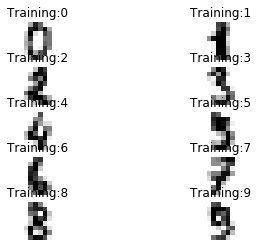

In [17]:
for index, (image, label) in enumerate(images_labels[:10]):
    plt.subplot(5,2, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training:%i' % label)



# CREATE CLASSIFIER 
## HERE USING SUPPORT VECTOR CLASSIFIER

In [18]:
n_samples = len(digits.images)    
data = digits.images.reshape(n_samples,-1)
classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

# Classification Report 


In [19]:
print("Classification report for classifier %s:\n%s\n"
% (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

#  Confusion metrics 

In [20]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


# PREDICTED IMAGES 

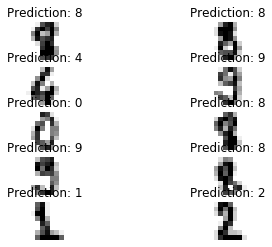

In [28]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(5,2, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()